In [10]:
import seaborn
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
Размерность данных: (768, 9)
Типы данных:
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object
Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-n

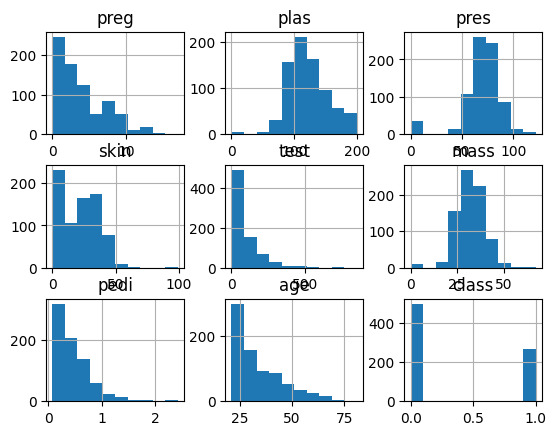

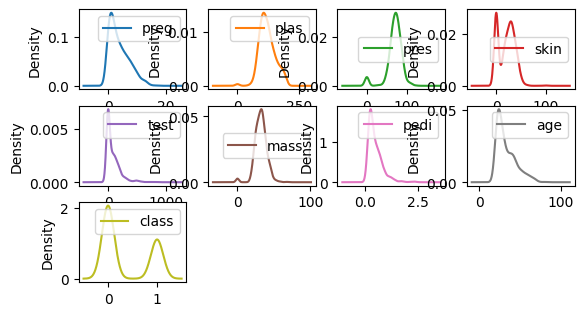

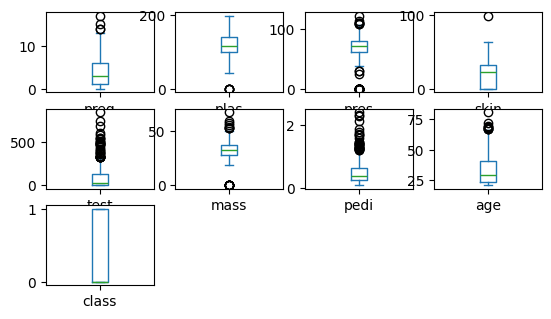

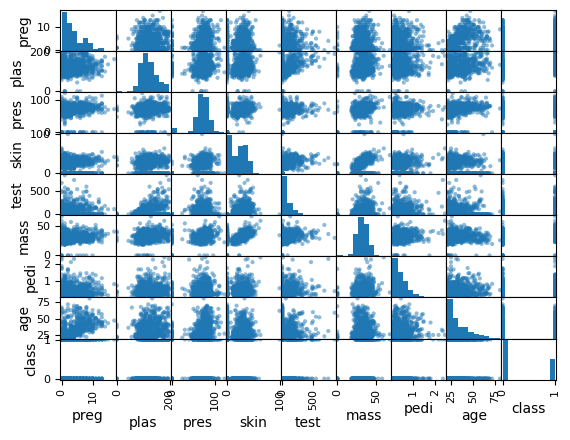

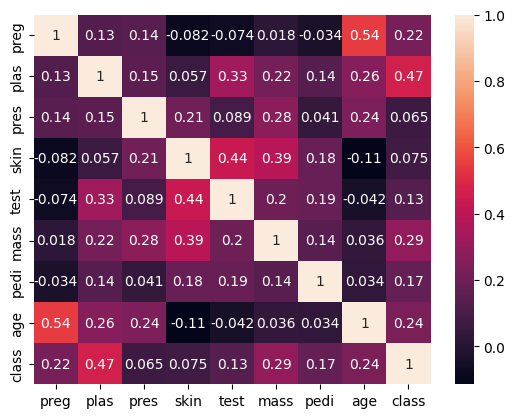

In [11]:
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names)
pd.set_option('display.precision', 3)

print(data.head())

print("Размерность данных:", data.shape)

print("Типы данных:")
print(data.dtypes)

print("Общая информация о данных:")
print(data.info())

print("Описательные статистики:")
print(data.describe())

print("Коэффициент корреляции Пирсона:")
print(data.corr(method='pearson'))

data.hist()
pyplot.show()

data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False)
pyplot.show()

data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)
pyplot.show()

scatter_matrix(data)
pyplot.show()

seaborn.heatmap(data.corr(), annot=True)
pyplot.show()


Этот код выполняет различные анализы данных:

Осуществляет вывод первых 5 наблюдений, размерности данных, типов данных и общей информации о данных.
Устанавливает точность вывода результатов до 3-х знаков после запятой.
Выводит описательные статистики и коэффициент корреляции Пирсона для каждой пары признаков.
Строит гистограммы, ядерные функции плотности, ящики с усами, диаграмму рассеяния и коррелограмму в виде тепловой карты.

In [12]:
from sklearn.model_selection import train_test_split

# Сохранение значений признаков в переменную array
array = data.values

# Выделение факторных признаков и результативного признака
X = array[:, :-1]  # Все столбцы, кроме последнего, содержат факторные признаки
Y = array[:, -1]  # Последний столбец содержит результативный признак

# Разбиение выборки на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


LR: -0.164 ( 0.017)
LASSO: -0.181 ( 0.014)
EN: -0.170 ( 0.013)
KNN: -0.192 ( 0.023)
CART: -0.274 ( 0.025)
SVR: -0.171 ( 0.020)
RFR: -0.164 ( 0.016)
GBR: -0.154 ( 0.019)
ETR: -0.167 ( 0.023)
ABR: -0.177 ( 0.016)


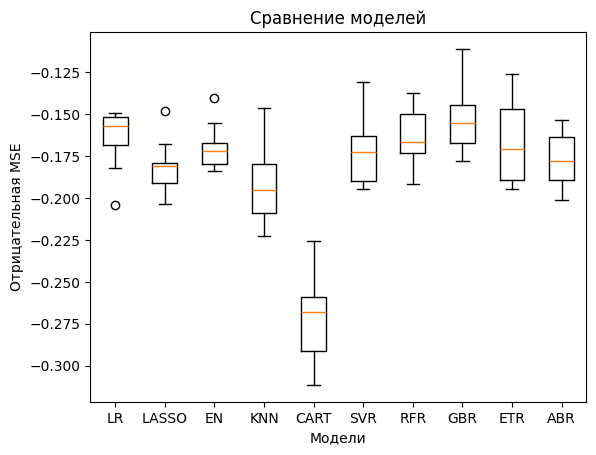

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

models = [('LR', LinearRegression()), ('LASSO', Lasso()), ('EN', ElasticNet()), ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()), ('SVR', SVR()), ('RFR', RandomForestRegressor()),
          ('GBR', GradientBoostingRegressor()), ('ETR', ExtraTreesRegressor()), ('ABR', AdaBoostRegressor())]

results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean(): .3f} ({cv_results.std(): .3f})")

import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Сравнение моделей')
plt.xlabel('Модели')
plt.ylabel('Отрицательная MSE')
plt.show()


Выбор лучшей модели зависит от наших конкретных требований и контекста. Основываясь на результате кросс-валидации, можно сделать выводы о том, какая модель показывает наилучшее среднее значение отрицательной MSE и наименьшее стандартное отклонение. В данном случае, модель GradientBoostingRegressor (GBR) имеет наименьшее среднее значение отрицательной MSE, что говорит о том, что она показывает наилучшую производительность среди рассмотренных моделей. Однако, выбор модели также может зависеть от других факторов, таких как интерпретируемость модели, время обучения и предсказания, а также требования к скорости работы.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

pipelines = [('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])),
             ('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])),
             ('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])),
             ('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])),
             ('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])),
             ('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])),
             ('ScaledRFR', Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())])),
             ('ScaledGBR', Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingRegressor())])),
             ('ScaledETR', Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesRegressor())])),
             ('ScaledABR', Pipeline([('Scaler', StandardScaler()), ('ABR', AdaBoostRegressor())]))]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean(): .3f} ({cv_results.std(): .3f})")

print("\nСредняя MSE и стандартное отклонение для каждой модели:")
for name, result in zip(names, results):
    print(f"{name}: {result.mean(): .3f} ({result.std(): .3f})")


ScaledLR: -0.165 ( 0.019)
ScaledLASSO: -0.227 ( 0.015)
ScaledEN: -0.227 ( 0.015)
ScaledKNN: -0.180 ( 0.028)
ScaledCART: -0.272 ( 0.059)
ScaledSVR: -0.170 ( 0.020)
ScaledRFR: -0.156 ( 0.023)
ScaledGBR: -0.159 ( 0.028)
ScaledETR: -0.162 ( 0.019)
ScaledABR: -0.176 ( 0.012)

Средняя MSE и стандартное отклонение для каждой модели:
ScaledLR: -0.165 ( 0.019)
ScaledLASSO: -0.227 ( 0.015)
ScaledEN: -0.227 ( 0.015)
ScaledKNN: -0.180 ( 0.028)
ScaledCART: -0.272 ( 0.059)
ScaledSVR: -0.170 ( 0.020)
ScaledRFR: -0.156 ( 0.023)
ScaledGBR: -0.159 ( 0.028)
ScaledETR: -0.162 ( 0.019)
ScaledABR: -0.176 ( 0.012)


Целесообразность создания программного конвейера заключается в том, что он позволяет автоматизировать процесс стандартизации данных и применения модели. Это делает код более читаемым, упрощает масштабирование и повторное использование, а также уменьшает вероятность ошибок. Кроме того, использование конвейера позволяет легко экспериментировать с разными моделями и способами предобработки данных.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
param_grid = {'n_neighbors': k_values}

model = KNeighborsRegressor()

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)

grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

print("Среднее MSE и стандартное отклонение для каждого значения параметра k:")
for mean, stdev, param in zip(means, stds, params):
    print(f"Среднее MSE: {mean: .3f} (Стандартное отклонение: {stdev: .3f}) при k={param['n_neighbors']}")


Среднее MSE и стандартное отклонение для каждого значения параметра k:
Среднее MSE: -0.249 (Стандартное отклонение:  0.192) при k=1
Среднее MSE:  0.105 (Стандартное отклонение:  0.054) при k=3
Среднее MSE:  0.203 (Стандартное отклонение:  0.096) при k=5
Среднее MSE:  0.237 (Стандартное отклонение:  0.078) при k=7
Среднее MSE:  0.251 (Стандартное отклонение:  0.069) при k=9
Среднее MSE:  0.241 (Стандартное отклонение:  0.063) при k=11
Среднее MSE:  0.237 (Стандартное отклонение:  0.060) при k=13
Среднее MSE:  0.239 (Стандартное отклонение:  0.058) при k=15
Среднее MSE:  0.247 (Стандартное отклонение:  0.051) при k=17
Среднее MSE:  0.255 (Стандартное отклонение:  0.057) при k=19
Среднее MSE:  0.250 (Стандартное отклонение:  0.048) при k=21


ScaledAdaBoost: Среднее MSE: -0.172 (Стандартное отклонение: 0.017)
ScaledGBM: Среднее MSE: -0.158 (Стандартное отклонение: 0.028)
ScaledRandomForest: Среднее MSE: -0.158 (Стандартное отклонение: 0.023)
ScaledExtraTrees: Среднее MSE: -0.161 (Стандартное отклонение: 0.025)


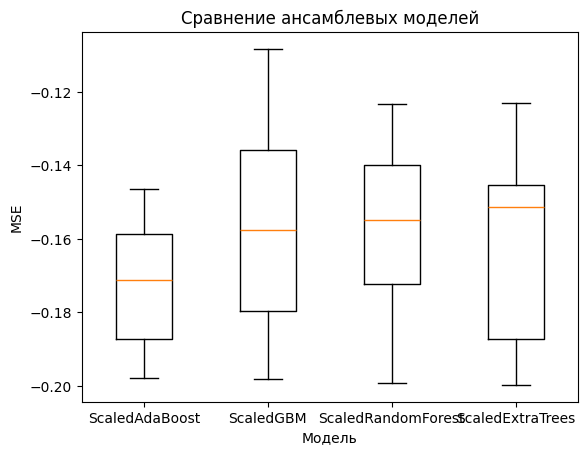

In [16]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ensembles = [('ScaledAdaBoost', Pipeline([('Scaler', StandardScaler()), ('AdaBoost', AdaBoostRegressor())])),
             ('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])), (
                 'ScaledRandomForest',
                 Pipeline([('Scaler', StandardScaler()), ('RandomForest', RandomForestRegressor())])),
             ('ScaledExtraTrees', Pipeline([('Scaler', StandardScaler()), ('ExtraTrees', ExtraTreesRegressor())]))]

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Среднее MSE: {cv_results.mean():.3f} (Стандартное отклонение: {cv_results.std():.3f})")

plt.boxplot(results, labels=names)
plt.title('Сравнение ансамблевых моделей')
plt.xlabel('Модель')
plt.ylabel('MSE')
plt.show()


Из результатов кросс-валидации видно, что модель градиентного бустинга (ScaledGBM) показывает наилучшую производительность с наименьшим средним MSE и стандартным отклонением по сравнению с другими моделями ансамблей. Это говорит о том, что модель градиентного бустинга лучше всего подходит для данной задачи прогнозирования.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)

best_ensemble_model = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])

best_ensemble_model.fit(rescaledX_train, Y_train)

rescaledX_test = scaler.transform(X_test)  # Предположим, что X_test - факторные признаки тестового набора

predicted_Y_test = best_ensemble_model.predict(rescaledX_test)

mse = mean_squared_error(Y_test, predicted_Y_test)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 0.17123054027925352


После выполнения тестирования нашей модели ансамбля на тестовом наборе данных мы получили среднеквадратичную ошибку (MSE) в размере примерно 6.089. Это значение показывает среднеквадратичную разницу между фактическими значениями и предсказанными значениями на тестовом наборе.